<a href="https://colab.research.google.com/github/prad69/MLNotebooks/blob/main/Assignment_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagine a building that uses a complex energy consumption system to regulate its temperature and lighting. The energy consumption system has several variables that affect its efficiency, such as the temperature setpoint, lighting levels, and ventilation rates. The function J(x) = x2 - 4x + 3 can be seen as a simplified model of the efficiency of the energy consumption system, where x represents one of the variables that affect the system's efficiency. For example, x could represent the temperature setpoint. By adjusting the value of x using Gradient Descent, the building managers can find the optimal temperature setpoint that would minimize the value of the cost function and result in the most efficient energy consumption system. This optimization would result in lower energy consumption costs and reduced carbon emissions, while still maintaining a comfortable environment for the building occupants. You will be implementing the Gradient Descent algorithm to find the minimum of the quadratic cost function.




1.976941569907863


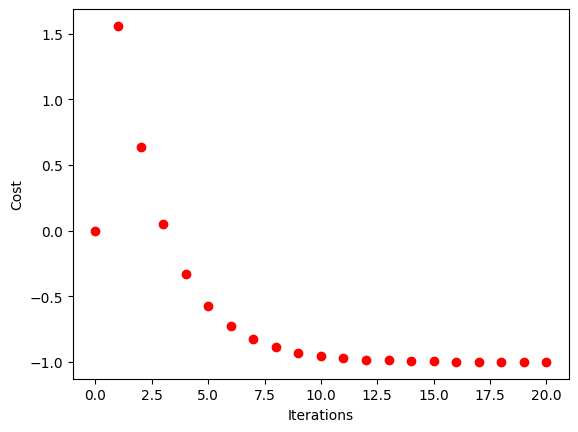

In [9]:
#  Q1) Implement the following function:
#  Performs Gradient Descent to optimize the cost function J(theta).
#  x -- initial parameter value (scalar)
#  alpha -- learning rate (scalar)
#  num_iters -- the number of iterations to run Gradient Descent (scalar)
# Returns:

#    x_final -- optimized parameter value

#    J_history -- vector of cost function values for each iteration (num_iters x 1)
import numpy as np
import matplotlib.pyplot as plt

# Define the Cost function J(x)
def J(x):
    return  x**2 - 4*x + 3

def gradient_descent(J, x_init, alpha, num_iters):

    x_final = x_init
    J_history = [x_final]
    for i in range(num_iters):
        x_final = x_final - alpha * (2*x_final-4)
        J_history.append(J(x_final))

    return x_final, J_history


# Set the hyperparameters
alpha = 0.1
num_iterations = 20


# Run gradient descent on f(x)
x_init = 0
x ,J_history= gradient_descent(J, x_init, alpha, num_iterations)
print (x)

# Plot the cost values
plt.plot(J_history,'ro')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()






Q2) Implementing different convergence criteria: Convergence criteria for gradient descent refers to the condition under which the algorithm is considered to have found an acceptable solution. There are several common convergence criteria for gradient descent, including,



a) Maximum number of iterations: In the previous code, you have limited the number of iterations that the algorithm will perform. The algorithm stops after a fixed number of iterations, regardless of the change in the objective function.



b) Minimum change in objective function: The algorithm can also be stopped when the change in the objective function between consecutive iterations falls below a certain threshold (called tolerance), indicating that the algorithm has converged to a preferred minimum. In other words, we need some minimum improvement in the objective function value between consecutive iterations that is considered significant enough to continue the optimization process. It is often specified as a small positive number, such as 1e-3 or 1e-6.



Choosing an appropriate tolerance value depends on the problem being solved and the computational resources available. A smaller tolerance value can lead to a more accurate solution but may require more iterations to achieve convergence, while a larger tolerance value can result in faster convergence but may not produce as accurate a solution. It is important to balance accuracy with computational efficiency when selecting a tolerance value for gradient descent.



Document the impact on the final solution for different tolerance values.

Converged after 59 iterations.


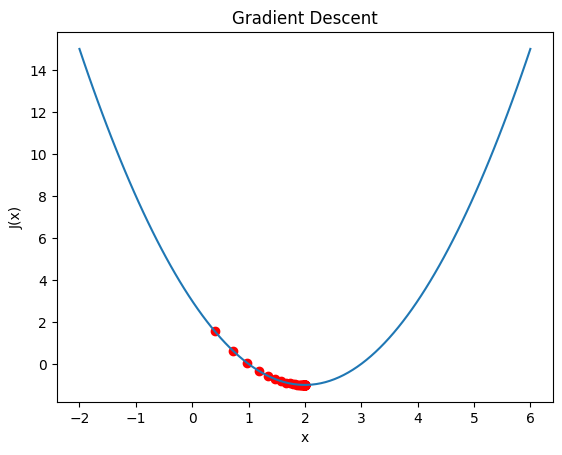

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Define the Cost function J(x)
def J(x):
    return  x**2 - 4*x + 3

def dJ(x):
    return 2*x-4

def gradient_descent(J, dJ, x, alpha, max_iters, tol):
    x_final = x
    J_history = [J(x)]
    for i in range(max_iters):
        x_old = x_final
        x_final = x_final - alpha*dJ(x_final)
        J_history.append(J(x_final))
        if abs(x_final - x_old) < tol:
            print("Converged after", i+1, "iterations.")
            break
        plt.plot(x_final, J(x_final), 'ro')
    else:
        print("Did not converge after", max_iters, "iterations.")
    return x_final, J_history


# Set the hyperparameters
x_initial = 0
alpha = 0.1
max_iters = 100
tol = 1e-6
x_final, J_history = gradient_descent(J, dJ, x_initial, alpha, max_iters, tol)

# Create an array of x values
x_vals = np.linspace(-2, 6, 100)



plt.plot(x_vals, J(x_vals), label='Function')

plt.xlabel('x')
plt.ylabel('J(x)')
plt.title('Gradient Descent')

plt.show()

# Observations
#For low tolerance levels, more iterations are needed to converge and higher tolerance,lessesnumber of iterations are needed


Starting optimization with x_initial = 0
Converged after 59 iterations.


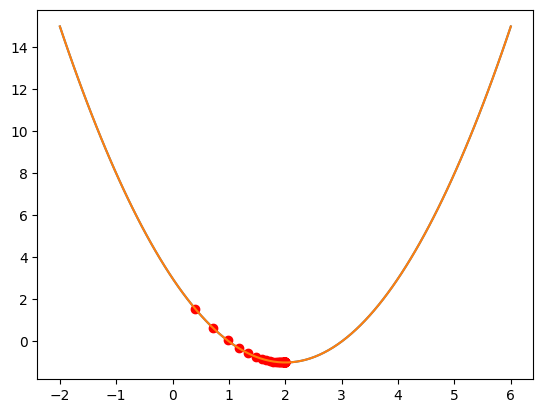

Starting optimization with x_initial = 5
Converged after 61 iterations.


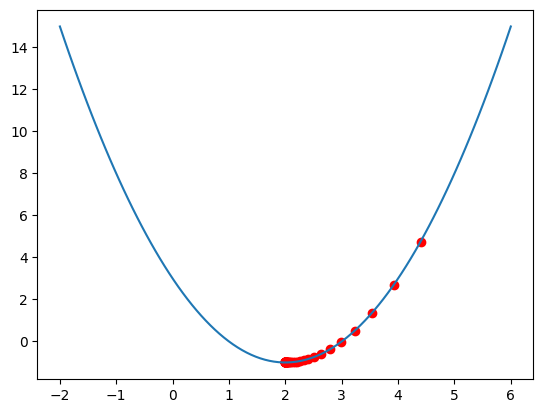

Starting optimization with x_initial = -1
Converged after 61 iterations.


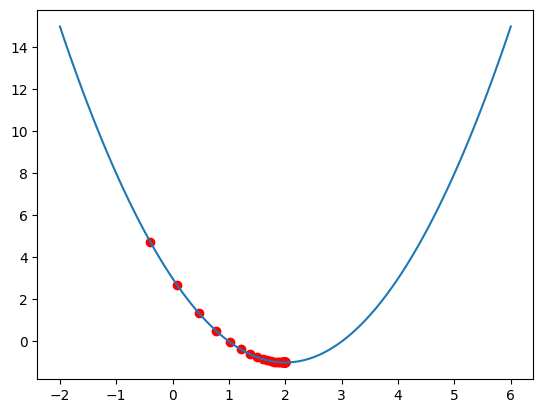

In [8]:
# Q3: Impact of different initialisations
import numpy as np
import matplotlib.pyplot as plt

# Define the function to be minimized
def J(x):
    return x**2 - 4*x + 3

# Define the derivative of the function
def dJ(x):
    return 2*x - 4

# Define the gradient descent algorithm
def gradient_descent(J, dJ, x, alpha, max_iters, tol):
    """
    Performs Gradient Descent to optimize the cost function J(theta).

    Arguments:
    J -- the cost function (scalar)
    dJ -- the derivative of the cost function (scalar)
    x -- initial parameter value (scalar)
    alpha -- learning rate (scalar)
    max_iters -- the maximum number of iterations to run Gradient Descent (scalar)
    tol -- the convergence tolerance level (scalar)

    Returns:
    x_final -- optimized parameter value
    J_history -- vector of cost function values for each iteration (num_iters x 1)
    """
    x_final = x
    J_history = [J(x)]
    for i in range(max_iters):
        x_old = x_final
        x_final = x_final - alpha*dJ(x_final)
        J_history.append(J(x_final))
        if abs(x_final - x_old) < tol:
            print("Converged after", i+1, "iterations.")
            break
        plt.plot(x_final, J(x_final), 'ro')
    else:
        print("Did not converge after", max_iters, "iterations.")
    return x_final, J_history

# Set the alpha, max_iters, and tol values
alpha = 0.1
max_iters = 100
tol = 1e-6

# Create an array of x values
x_vals = np.linspace(-2, 6, 100)

# Plot the function
plt.plot(x_vals, J(x_vals), label='Function')

# Test different initializations of x_initial
x_initials = [0, 5, -1]
#colors = ['r', 'g', 'b']
for i, x_initial in enumerate(x_initials):
    print("Starting optimization with x_initial =", x_initial)
    x_final, J_history = gradient_descent(J, dJ, x_initial, alpha, max_iters, tol)
    plt.plot(x_vals, J(x_vals))
    #plt.plot(x_initial, J(x_initial), 'bo', label='Initial')
    #plt.plot(x_final, J(x_final), 'go', label='Final')
    #plt.plot(range(len(J_history)), J_history, colors[i]+'-', label='J history')
    #plt.legend()
    plt.show()
